# Metrics 

In [2]:
import matplotlib.pyplot as plt
import numpy as np


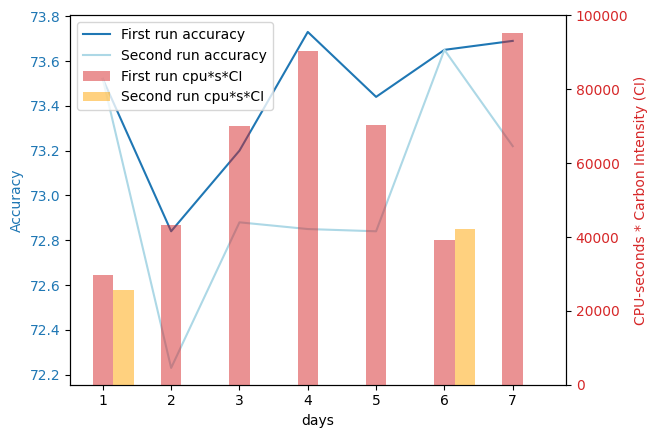

Cumulative first run:  438398.7
Cumulative second run:  67881.0
Carbon emitted percentage (first run more than second run):  545.8341804039422


In [18]:

# data from experiments
first_run_cpu_s = [105.7, 97.4, 126.8, 146.9, 174.2, 175.0, 212.8]
second_run_cpu_s = [91.3, 0, 0, 0, 0, 188.1, 0]
first_run_acc = [0.7352, 0.7284, 0.7320, 0.7373, 0.7344, 0.7365, 0.7369]
second_run_acc = [0.7352, 0.7223, 0.7288, 0.7285, 0.7284, 0.7365, 0.7322]

# carbon intensity in DE (14.11-20.11.2023) from https://www.electricitymap.org/map
carbon_intensity = [282, 445, 552, 615, 404, 224, 448]

first_run_cpus_ci = np.array(first_run_cpu_s) * np.array(carbon_intensity)
second_run_cpus_ci = np.array(second_run_cpu_s) * np.array(carbon_intensity)

x = np.arange(1, len(first_run_cpu_s)+1)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('days')
ax1.set_ylabel('Accuracy %', color=color)
ax1.plot(x, np.array(first_run_acc) * 100, label='First run accuracy', color=color)
ax1.plot(x, np.array(second_run_acc) * 100, label='Second run accuracy', color='lightblue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('CPU-seconds * Carbon Intensity (CI)', color=color)
ax2.bar(x[:10], first_run_cpus_ci, width=0.3, alpha=0.5, label='First run cpu*s*CI', color=color)
ax2.bar(x[:10] + 0.3, second_run_cpus_ci, width=0.3, alpha=0.5, label='Second run cpu*s*CI', color='orange')  # Offset for better visibility
ax2.tick_params(axis='y', labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

cumulative_first_run = np.sum(first_run_cpus_ci)
cumulative_second_run = np.sum(second_run_cpus_ci)

print('Cumulative first run: ', cumulative_first_run)
print('Cumulative second run: ', cumulative_second_run)

print('Carbon emitted percentage (first run more than second run): ', (cumulative_first_run - cumulative_second_run) / cumulative_second_run * 100)

